# Unit 5 - Financial Planning

In [7]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [8]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [9]:
my_btc = 1.2
my_eth = 5.3

In [10]:
# Crypto API URLs
#btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?"
#eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD?"


In [11]:
# Fetch current BTC price
# YOUR CODE HERE!
#response_data= requests.get(btc_url)
#response_content=response_data.content
#data = response_data.json()

#public secret key (API key)& nc p

#bitcoin
bitcoin_response = requests.get(btc_url).json()
bitcoin_price = bitcoin_response['data']['1']['quotes']['USD']["price"]
print(bitcoin_price)

#ethereum
ethereum_response = requests.get(eth_url).json()
ethereum_price = ethereum_response['data']['1027']['quotes']['USD']['price']
print(ethereum_price)

#selected_value = data['data'][1][id]['quotes']['USD']['price']
#response_data['price']

#my_btc_value = my_btc * bitcoin_price
#btc_eth = my_eth * ethereum_price

# Print current crypto wallet balance
#print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
#print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

18814.85
1295.38


In [12]:
my_btc_value = my_btc * bitcoin_price
my_eth_value = my_eth * ethereum_price

In [13]:
print(my_btc_value)
print(my_eth_value)

22577.819999999996
6865.514


In [14]:
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22577.82
The current value of your 5.3 ETH is $6865.51


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [15]:
# Set current amount of shares
#bond etf (agg) 
my_agg = 200
my_spy = 50

In [16]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_pkey")
alpaca_secret_key = os.getenv("api_skey")
print(alpaca_api_key)
print(alpaca_secret_key)
# Create the Alpaca API object
alpaca= tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")
# YOUR CODE HERE!

PKW6WDY6JOBSHOZEHG6Z
5ARlWJdOk07xmPzwxAv64lwuHKYWrpgunp4cy1nB


In [51]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-08-07", tz= "America/New_York").isoformat()
print(today)
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio=alpaca.get_bars(tickers, timeframe, start=today, end=today).df
df_portfolio

# Reorganize the DataFrame
# Separate ticker data
AGG= df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol',axis=1)
SPY= df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol',axis=1)
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio= pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])
# Preview DataFrame
# YOUR CODE HERE!
print(df_portfolio) 

2020-08-07T00:00:00-04:00
                              AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.29  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372  


In [92]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
#df_closing_prices= pd.Dataframe() 
#df_closing_prices["AGG"]= df_portfolio["AGG"]["close"] $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$2@@&*^*^
#%#^#%^%%%%%%#5#%$%$%$^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#df_closing_prices["SPY"]= df_portfolio["SPY"]["close"] 
agg_close_price= df_portfolio["AGG"]["close"]
spy_close_price= df_portfolio["SPY"]["close"]

# Print AGG and SPY close prices                                                      
print(f"Current AGG closing price: ${agg_close_price[0]}")
print(f"Current SPY closing price: ${spy_close_price[0]}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [119]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value= spy_close_price[0] * my_spy 
my_spy_value
my_agg_value= agg_close_price[0] * my_agg
my_agg_value
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [118]:
# Set monthly household income
# YOUR CODE HERE!
monthly_household_income = "12000"
# Consolidate financial assets data
# YOUR CODE HERE!

crypto_value=my_btc_value+ my_eth_value
shares_value= my_spy_value + my_agg_value
df_savings= pd.DataFrame([crypto_value,shares_value], columns=["amount"], index=['crypto_value', 'shares_value']) 
#savings_data 

# Create savings DataFrame
# YOUR CODE HERE!
#df_savings= df_savings.set_index("crypto_value","shares_value")

# Display savings DataFrame
display(df_savings)

,amount
crypto_value,29443.334
shares_value,40614.500


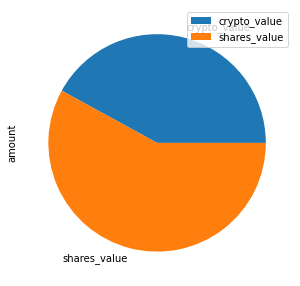

In [116]:
# Plot savings pie chart
# YOUR CODE HERE!
         #pd.Dataframe(    index=['crypto','shares'])
plot=df_savings.plot.pie(y='amount', figsize=(5,5))

In [13]:
 Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_amount_savings= df_savings() 
   
# Validate saving health
# YOUR CODE HERE!
  if total_amount_savings>df_savings: 
        print(f" congratulating the person for having enough money in this fund)
              
        elif total_amount_savings=df_savings: 
              print(    congratulating the person on reaching this financial goal.
        else total_amount_savings<df_savings:
                print(f"(you are $["df_savings"-"total_amount_savings"] amount of short from reaching the goal))


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [58]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [63]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
#@&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&%############%^#$^@$%#%#$
timeframe = "1day"
df_ticker= alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date).df
print(df_ticker)

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY= df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG= df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_ticker=pd.concat([SPY,AGG], axis=1, keys=['SPY','AGG'])

# Display sample data
df_ticker.head()

                             open      high       low   close    volume  \
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61   3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81   3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86   2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14   3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97   2718710   
...                           ...       ...       ...     ...       ...   
2021-04-26 04:00:00+00:00  417.42  418.2200  416.8111  417.61  51824860   
2021-04-27 04:00:00+00:00  417.97  418.1400  416.3000  417.52  50297139   
2021-04-28 04:00:00+00:00  417.84  419.0100  416.9000  417.40  50692781   
2021-04-29 04:00:00+00:00  420.38  420.7200  416.4400  420.06  76965583   
2021-04-30 04:00:00+00:00  417.67  418.5400  416.3400  417.30  84731942   

                        

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967

In [65]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear= MCSimulation(portfolio_data=df_ticker, weights=[.6,.4], num_simulation=500, num_trading_days=252*30)

In [66]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [67]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sjs22\Downloads\Starter_Code (4)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003833,1.020080,0.998248,0.997853,1.007957,0.999795,0.997265,0.994769,1.010562,0.996506,...,1.019454,1.009364,1.012832,1.003213,1.012300,0.991188,1.010313,0.999568,1.006842,1.012234
2,1.002797,1.028090,0.998646,1.001530,1.009021,0.998242,1.003102,0.993455,1.003677,0.997316,...,1.024060,1.004695,1.021331,0.996302,1.015212,0.984960,1.009885,0.997043,1.013329,1.013515
3,1.011514,1.025135,0.986261,1.003094,1.002695,0.998205,0.993116,0.982789,1.001179,0.989886,...,1.039902,0.998139,1.028399,0.997146,1.007540,0.983542,1.010279,0.996934,1.018807,1.021878
4,1.002781,1.034659,0.973016,0.996774,0.995286,1.013381,0.992338,0.981291,0.995515,0.983538,...,1.032220,1.007563,1.029895,0.988468,1.004947,0.964307,1.013910,1.001312,1.025029,1.020120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.281709,8.296838,10.398657,9.603647,8.983411,6.005648,13.699684,7.725183,7.851699,12.523381,...,21.178934,15.471785,20.366898,7.260183,24.011658,6.754393,15.468099,27.914489,27.048816,19.413731
7557,20.304016,8.369836,10.369877,9.626050,9.012094,5.956810,13.833689,7.743267,7.841936,12.604121,...,21.254700,15.548086,20.227273,7.223262,23.903749,6.702688,15.551970,28.272258,27.357890,19.531352
7558,20.157453,8.385815,10.386758,9.759974,8.988092,5.948037,13.714965,7.721592,7.794360,12.574025,...,21.089960,15.557752,20.315764,7.227799,23.867574,6.651262,15.675493,27.877950,27.273872,19.591198
7559,20.091259,8.433090,10.476471,9.768226,8.969466,5.977948,13.731393,7.636854,7.798215,12.649949,...,20.992883,15.719525,20.358733,7.217347,23.862729,6.682016,15.711024,27.909001,27.024320,19.614627


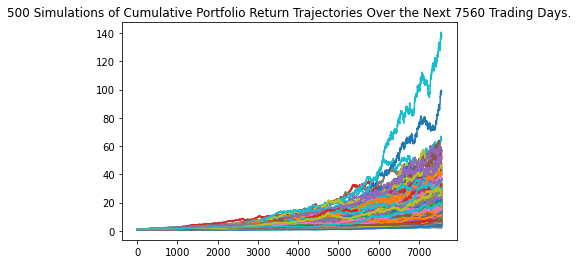

In [68]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot= MC_thirtyyear.plot_simulation()

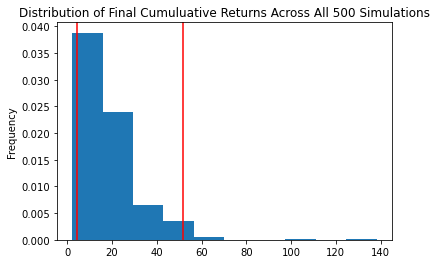

In [69]:
# Plot probability distribution and confidence intervalsMC_thirtyyearYOUR CODE HERE!
dist_plot= MC_thirtyyear.plot_distribution() 

### Retirement Analysis

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl=MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             18.586173
std              13.021001
min               2.193608
25%              10.510331
50%              15.105126
75%              23.514098
max             138.171885
95% CI Lower      4.330503
95% CI Upper     51.875383
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [72]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower= round(tbl[8]*20000,2)
ci_upper= round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${20000} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86610.05 and $1037507.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


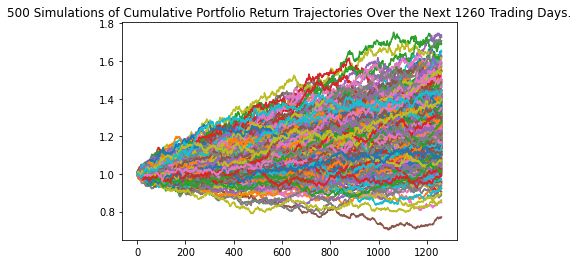

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

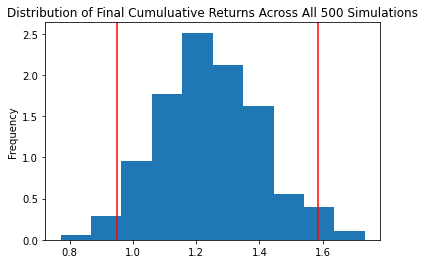

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [78]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear= MCSimulation(portfolio_data=df_ticker, weights=[.8,.2], num_simulation=500, num_trading_days=252*10)

In [79]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sjs22\Downloads\Starter_Code (4)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

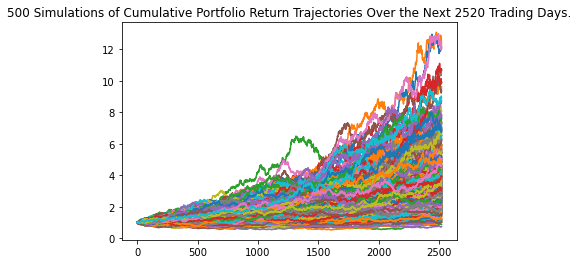

In [80]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot= MC_tenyear.plot_simulation()

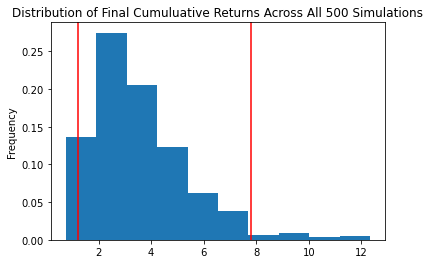

In [81]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot= MC_tenyear.plot_distribution() 

In [85]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_tenyear=MC_tenyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_tenyear)

count           500.000000
mean              3.568647
std               1.832572
min               0.754700
25%               2.261870
50%               3.202345
75%               4.414750
max              12.335394
95% CI Lower      1.205536
95% CI Upper      7.784293
Name: 2520, dtype: float64


In [86]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten= round(tbl[8]*60000,2)
ci_upper_ten= round(tbl[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${60000} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $259830.15 and $3112522.96


In [ ]:
# More heavily into stocks will favour the chance of retirement after 10 years. 